In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
text = """경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다
"""

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [ ]:
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


훈련 데이터 만들기

In [ ]:
text.split("\n")

['경마장에 있는 말이 뛰고 있다', '그의 말이 법이다', '가는 말이 고와야 오는 말이 곱다', '']

In [ ]:
tokenizer.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])

[[2, 3, 1, 4, 5]]

In [ ]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0] #이중 리스트이므로 [0]으로 리스트 하나를 벗겨줌
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [ ]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [ ]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


전체 훈련 데이터에서 가장 긴 샘플의 길이가 6임으로 전체 샘플의 길이를 6으로 패딩

In [ ]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [ ]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


In [ ]:
sequences = np.array(sequences)
# 마지막 열을 y로 분리
X = sequences[:,:-1] 
y = sequences[:,-1]

In [ ]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [ ]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


레이블에 대해서 원핫인코딩 수행

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [ ]:
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # 12차원 ->10차원
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 2s - loss: 2.4974 - accuracy: 0.0909 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 2.4840 - accuracy: 0.0909 - 17ms/epoch - 17ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4707 - accuracy: 0.0909 - 14ms/epoch - 14ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4573 - accuracy: 0.0909 - 20ms/epoch - 20ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4438 - accuracy: 0.0909 - 9ms/epoch - 9ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4301 - accuracy: 0.1818 - 12ms/epoch - 12ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4160 - accuracy: 0.3636 - 15ms/epoch - 15ms/step
Epoch 8/200
1/1 - 0s - loss: 2.4015 - accuracy: 0.4545 - 12ms/epoch - 12ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3865 - accuracy: 0.4545 - 14ms/epoch - 14ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3708 - accuracy: 0.4545 - 10ms/epoch - 10ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3545 - accuracy: 0.4545 - 9ms/epoch - 9ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3375 - accuracy: 0.4545 - 8ms/epoch - 8ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3197 - accuracy

model.predict("경마장에") --> 불가능/ "경마장에"도 전처리를 해줘야함 

In [ ]:
encoded = tokenizer.texts_to_sequences(["경마장에"])[0]
encoded = pad_sequences([encoded], padding="pre", maxlen=5)
result = model.predict(encoded, verbose=0)
print(result)

[[0.00272314 0.18267302 0.0050981  0.70032156 0.00890508 0.01294187
  0.00294137 0.03126458 0.00371258 0.02345515 0.0243859  0.00157764]]


In [ ]:
sum(result[0])

0.9999999891733751

In [ ]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('ChatbotData.csv')
text_a = df.A.copy()
text_q = df.Q.copy()
text_q.shape

(11823,)

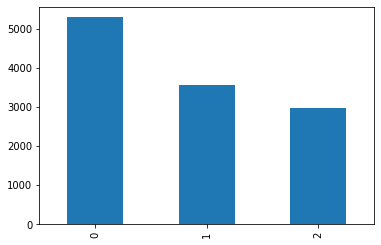

In [7]:
df["label"].value_counts().plot(kind="bar")

In [8]:
list(text_q)[:10]

['12시 땡!',
 '1지망 학교 떨어졌어',
 '3박4일 놀러가고 싶다',
 '3박4일 정도 놀러가고 싶다',
 'PPL 심하네',
 'SD카드 망가졌어',
 'SD카드 안돼',
 'SNS 맞팔 왜 안하지ㅠㅠ',
 'SNS 시간낭비인 거 아는데 매일 하는 중',
 'SNS 시간낭비인데 자꾸 보게됨']

In [9]:
tokenizer_q = Tokenizer()
# fit_on_texts() 메서드 : 현재 Tokenizer 객체를 해당 데이터에 맞게 fitting 해줌
tokenizer_q.fit_on_texts(list(text_q))
# tokenizer의 word_index 속성 : 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환
vocab_size_q = len(tokenizer_q.word_index) + 1
# print('단어 집합의 크기 : %d' % vocab_size_q)
print('단어 집합의 크기 : {}'.format(vocab_size_q))
print(tokenizer_q.word_index)

단어 집합의 크기 : 13399
{'너무': 1, '좋아하는': 2, '거': 3, '싶어': 4, '같아': 5, '안': 6, '나': 7, '좀': 8, '사람': 9, '내가': 10, '싶다': 11, '어떻게': 12, '썸': 13, '왜': 14, '내': 15, '사람이': 16, '이별': 17, '것': 18, '잘': 19, '없어': 20, '수': 21, '오늘': 22, '자꾸': 23, '이제': 24, '있어': 25, '또': 26, '많이': 27, '다': 28, '있을까': 29, '헤어진지': 30, '해': 31, '다시': 32, '될까': 33, '여자친구가': 34, '남자친구가': 35, '더': 36, '진짜': 37, '정말': 38, '게': 39, '나를': 40, '뭐': 41, '좋아': 42, '할까': 43, '하고': 44, '하는': 45, '연애': 46, '있는': 47, '계속': 48, '힘드네': 49, '연락': 50, '이': 51, '나만': 52, '먹고': 53, '이렇게': 54, '있는데': 55, '못': 56, '날': 57, '혼자': 58, '다른': 59, '방법': 60, '타는': 61, '한': 62, '그': 63, '안돼': 64, '그냥': 65, '없는': 66, '돼': 67, '짝남이': 68, '좋겠다': 69, '선물': 70, '모르겠어': 71, '같이': 72, '나한테': 73, '같은데': 74, '싫어': 75, '친구가': 76, '마음이': 77, '짝사랑': 78, '가고': 79, '사랑': 80, '헤어진': 81, '많아': 82, '힘들어': 83, '연락이': 84, '줄': 85, '좋겠어': 86, '술': 87, '후': 88, '짝남': 89, '듯': 90, '좋은': 91, '좋을까': 92, '나는': 93, '보고': 94, '해도': 95, '할': 96, '사랑이': 97, '짝녀가': 98, '말': 

In [17]:
sequences_q = list()
for line in text_q: # 문장 토큰화
    # texts_to_sequences()메서드 :해당 문자열의 각 단어를 인덱스로 치환
    encoded = tokenizer_q.texts_to_sequences([line])[0]# 이중 리스트중에 하나를 벗김
    for i in range(1, len(encoded)): 
        sequence = encoded[:i+1]
        sequences_q.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences_q))

학습에 사용할 샘플의 개수: 30625


In [18]:
print(sequences_q)

[[4646, 4647], [4648, 343], [4648, 343, 448], [2580, 803], [2580, 803, 11], [2580, 804], [2580, 804, 803], [2580, 804, 803, 11], [4649, 2581], [2582, 4650], [2582, 64], [805, 4651], [805, 4651, 14], [805, 4651, 14, 4652], [805, 4653], [805, 4653, 3], [805, 4653, 3, 502], [805, 4653, 3, 502, 238], [805, 4653, 3, 502, 238, 45], [805, 4653, 3, 502, 238, 45, 106], [805, 4654], [805, 4654, 23], [805, 4654, 23, 4655], [4656, 52], [4656, 52, 1128], [4656, 52, 1128, 28], [4656, 52, 1128, 28, 1373], [693, 266], [693, 2583], [693, 2583, 266], [2584, 4657], [2584, 4657, 324], [4658, 4659], [4658, 4659, 4660], [4661, 1129], [4661, 1129, 2585], [4662, 4663], [4662, 4663, 1374], [2586, 4664], [2586, 4664, 1375], [2586, 4665], [2586, 4665, 2587], [2586, 4665, 2587, 5], [1811, 1], [1811, 1, 27], [1811, 1, 27, 4666], [1811, 2588], [1811, 2588, 1130], [1811, 2588, 1130, 4667], [1811, 628], [1811, 628, 1131], [944, 1812], [944, 1812, 154], [944, 1812, 154, 128], [1132, 176], [1132, 176, 1376], [1132, 176

In [19]:
# 가장 긴 시퀀스에 길이를 맞추기
max_len_q = max(len(l) for l in sequences_q) 
print('샘플의 최대 길이 : %d'% max_len_q)

# pad_sequences()메서드 : 제로패딩해줌
sequences_q = pad_sequences(sequences_q, maxlen=max_len_q, padding='pre') # padding='pre' 앞단이 0으로 채워짐
print(sequences_q)

sequences_q = np.array(sequences_q)
X_chatbot_q = sequences_q[:,:-1]
y_chatbot_q = sequences_q[:, -1]
print('X:', X_chatbot_q)
print('y:', y_chatbot_q)
print('전체 y의 개수:', len(y_chatbot_q))
print('고유값 y의 개수:', np.unique(y_chatbot_q)[-1]+1)

y_one_q = to_categorical(y_chatbot_q, num_classes = vocab_size_q)
print("one_hot_vector y:", y_one_q)

샘플의 최대 길이 : 15
[[    0     0     0 ...     0  4646  4647]
 [    0     0     0 ...     0  4648   343]
 [    0     0     0 ...  4648   343   448]
 ...
 [    0     0     0 ...    91 13396   112]
 [    0     0     0 ... 13396   112 13397]
 [    0     0     0 ...     0   555 13398]]
X: [[    0     0     0 ...     0     0  4646]
 [    0     0     0 ...     0     0  4648]
 [    0     0     0 ...     0  4648   343]
 ...
 [    0     0     0 ...    46    91 13396]
 [    0     0     0 ...    91 13396   112]
 [    0     0     0 ...     0     0   555]]
y: [ 4647   343   448 ...   112 13397 13398]
전체 y의 개수: 30625
고유값 y의 개수: 13399
one_hot_vector y: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
# model design
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM
embedding_dim = 32
hidden_units = 64

model_q = Sequential()
model_q.add(Embedding(vocab_size_q, embedding_dim))
model_q.add(SimpleRNN(hidden_units))
model_q.add(Dense(vocab_size_q, activation='softmax'))
model_q.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_q.fit(X_chatbot_q, y_one_q, epochs=200, verbose=2)

Epoch 1/200
958/958 - 21s - loss: 8.6658 - accuracy: 0.0144 - 21s/epoch - 22ms/step
Epoch 2/200
958/958 - 21s - loss: 7.9626 - accuracy: 0.0245 - 21s/epoch - 22ms/step
Epoch 3/200
958/958 - 19s - loss: 7.5539 - accuracy: 0.0357 - 19s/epoch - 20ms/step
Epoch 4/200
958/958 - 21s - loss: 7.1375 - accuracy: 0.0455 - 21s/epoch - 22ms/step
Epoch 5/200
958/958 - 22s - loss: 6.7240 - accuracy: 0.0589 - 22s/epoch - 23ms/step
Epoch 6/200
958/958 - 19s - loss: 6.3157 - accuracy: 0.0797 - 19s/epoch - 20ms/step
Epoch 7/200
958/958 - 19s - loss: 5.9140 - accuracy: 0.1040 - 19s/epoch - 20ms/step
Epoch 8/200
958/958 - 19s - loss: 5.5182 - accuracy: 0.1355 - 19s/epoch - 20ms/step
Epoch 9/200
958/958 - 20s - loss: 5.1301 - accuracy: 0.1778 - 20s/epoch - 21ms/step
Epoch 10/200
958/958 - 20s - loss: 4.7534 - accuracy: 0.2224 - 20s/epoch - 21ms/step
Epoch 11/200
958/958 - 20s - loss: 4.3894 - accuracy: 0.2742 - 20s/epoch - 21ms/step
Epoch 12/200
958/958 - 20s - loss: 4.0441 - accuracy: 0.3277 - 20s/epoch -

In [21]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence
print(sentence_generation(model_q, tokenizer_q, '왜', 3))

왜 좋아하는 남자가 생일이네


In [22]:
print(sentence_generation(model_q, tokenizer_q, '좋아하는', 3))

좋아하는 사람이 잘 쳐다봐
